In [40]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import Dense, LSTM


from sklearn.preprocessing import MinMaxScaler

In [20]:
df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


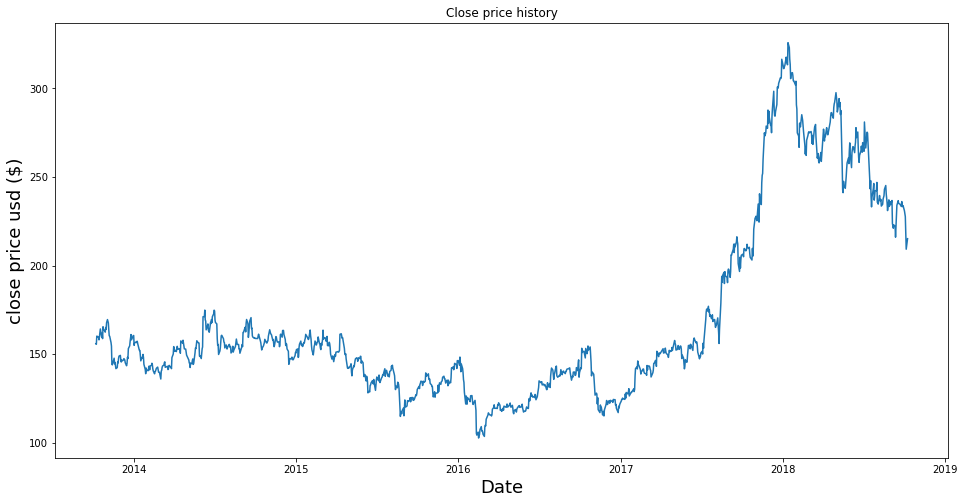

In [39]:
df["Date"]= pd.to_datetime(df.Date,format= '%Y-%m-%d')
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df["Close"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price usd ($)',fontsize=18)
plt.show()

In [42]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8)
training_data_len 


988

In [43]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

In [47]:
#training  data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.50425818, 0.47758853, 0.51792918, 0.56006275, 0.57485433,
       0.58762887, 0.58538772, 0.58987001, 0.59816226, 0.58561183,
       0.59143882, 0.59278351, 0.59345585, 0.60040341, 0.58852532,
       0.53787539, 0.50806813, 0.5349619 , 0.53922008, 0.53070372,
       0.53675482, 0.5425818 , 0.60085164, 0.59009413, 0.59771403,
       0.5912147 , 0.58583595, 0.60242044, 0.57530255, 0.59524877,
       0.61810847, 0.63872703, 0.62909009, 0.61272972, 0.60466159,
       0.5912147 , 0.58673241, 0.60354101, 0.59928283, 0.6048857 ,
       0.61340206, 0.59166293, 0.59524877, 0.59614523, 0.64657104,
       0.62550426, 0.62572837, 0.61160914, 0.6017481 , 0.64388167,
       0.63043478, 0.609368  , 0.58471537, 0.60959211, 0.65105334,
       0.63021067, 0.70035858, 0.72859704, 0.7492156 , 0.77140296])]
[0.7736441057821604]

[array([0.50425818, 0.47758853, 0.51792918, 0.56006275, 0.57485433,
       0.58762887, 0.58538772, 0.58987001, 0.59816226, 0.58561183,
       0.59143882, 0.59278351, 0.593

In [48]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(928, 60, 1)

In [51]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

2021-09-01 18:44:16.164067: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-01 18:44:16.178139: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [52]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
928/928 [==============================] - 153s 165ms/step - loss: 0.0029


In [54]:
#create testing Data set
#create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [55]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [56]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [57]:
#get model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [58]:
#evaluate the model (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse 


1.2221750236233238

/Users/roblove/opt/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


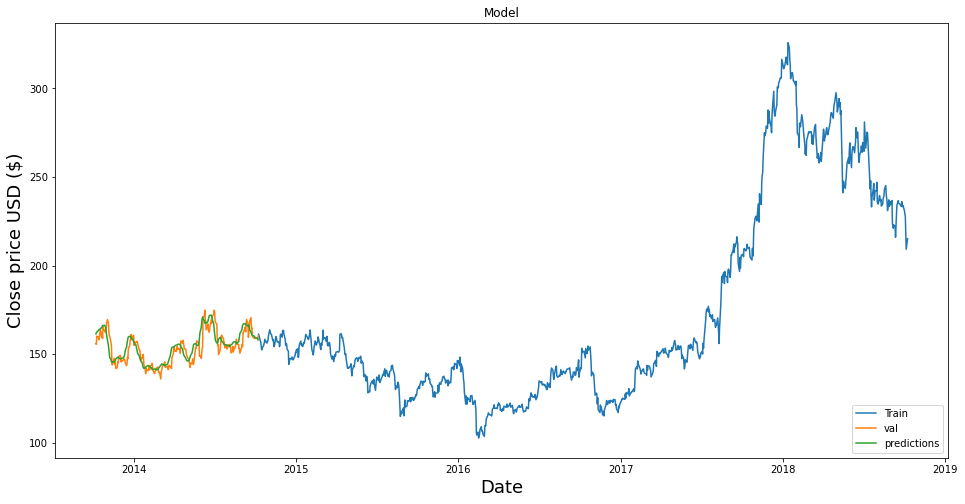

In [68]:
#plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'val', 'predictions'], loc = 'lower right')
plt.show()

In [69]:
# Show the value and predicted prices
valid

,Close,predictions
Date,,
2014-10-08,160.25,157.997314
2014-10-07,158.80,158.836975
2014-10-01,158.85,159.450729
2014-09-30,159.35,159.880661
2014-09-29,159.00,160.212753
...,...,...
2013-10-14,159.45,163.309616
2013-10-11,160.05,162.776672
2013-10-10,160.15,162.359024


In [ ]:
#get quote
